# Twitter Sentiment Analysis

**Installing Required Libraries**



1.   tweepy to get tweets from twitter apis
2.   TextBlob to analyse and get polarity for all tweets
3.   matplotlib for drawing pie chart of the data



In [0]:
!pip install tweepy

In [0]:
!pip install textblob

In [0]:
!pip install matplotlib

Importing all required libraries

In [0]:
import tweepy

In [0]:
import csv


In [0]:
from textblob import TextBlob

Authenticating for twitter apis using tweepy.

You can get all the keys by creating a developer account on twitter from [here.](https://https://developer.twitter.com/en/apps)

In [0]:
consumer_key='<YOUR CONSUMER KEY FROM TWITTER APIS>'
consumer_secret='<YOUR CONSUMER SECRET/PASSWORD FROM TWITTER APIS'
access_token='<YOUR ACCESS TOKEN FOR API>'
access_token_secret='<YOUR ACCESS TOKEN SECRET FOR API>'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)



Generating CSV file with tweets and their polarities


RTs are not considered! So, we get out of the trap of Hashtag from here.


In [7]:
positive = 0
total=0
negative = 0
neutral = 0
with open('tweets_recorded.csv', 'w', newline='') as csvfile:
    filewriter = csv.writer(csvfile)
    for tweet in tweepy.Cursor(api.search, q="Narendra Modi", rpp=100, count=20, result_type="recent", include_entities=True, lang="en").items(200):
      if (not tweet.retweeted) and ('RT @' not in tweet.text):
        total = total+1
        polarity = 'neutral'
        #print('Tweet: ' + tweet.text)
        analysis = TextBlob(tweet.text)
        #print(analysis.sentiment)
        if(analysis.sentiment.polarity > 0.2):
          polarity='positive'
          positive = positive +1
        if(analysis.sentiment.polarity < -0.2):
          polarity= 'negative'
          negative = negative +1
        if(analysis.sentiment.polarity <0.2):
          if(analysis.sentiment.polarity > -0.2):
            neutral = neutral +1
        #print(polarity)
        filewriter.writerow([polarity, analysis.sentiment.polarity, tweet.text])
print("Total Results ", total)
 

Total Results  36


Plotting the pie chart to visualise the statistics of tweet's sentiment

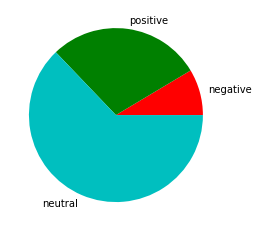

In [8]:
cols = ['r', 'g', 'c']
lables = ['negative', 'positive', 'neutral']
data= [negative, positive, neutral]

import matplotlib.pyplot as plt
plt.pie(data, labels=lables, colors=cols)
plt.show()

Congratulations! You just completed a survey on twitter.

**Developed by Tushar Ojha**

Follow me on: 
[twitter](https://twitter.com/techtusharojha), [github](https://github.com/tusharojha), [instagram](https://instagram.com/iamtusharojha).